# Question 
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
- Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
cd = pd.read_csv('D:\\Data Science\\Assignment 15\\Raw data\\Company_Data.csv')
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
cd.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# Performing EDA

In [5]:
cd.duplicated().value_counts()

False    400
dtype: int64

In [6]:
cdnew = cd.copy()
cdnew = pd.get_dummies(cd,columns=['ShelveLoc','Urban','US'])

In [7]:
cdnew.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


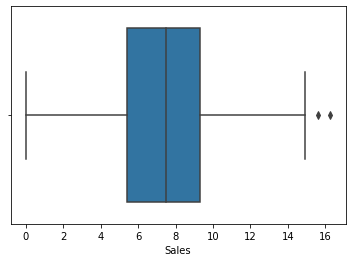

In [8]:
sns.boxplot(cd['Sales'])
plt.show()

### The Data has 2 Outiers.

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


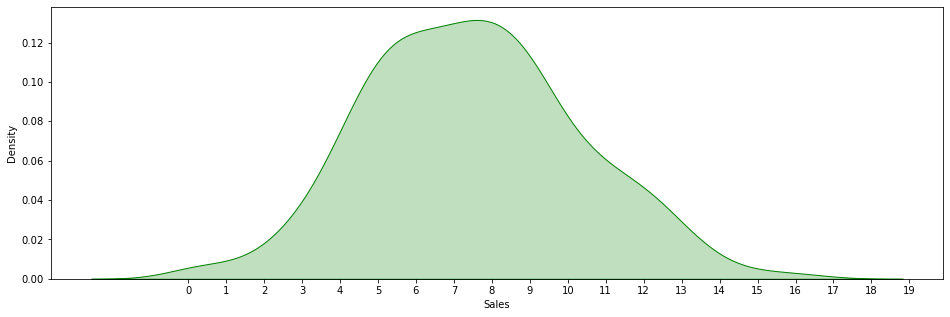

In [9]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(cd['Sales'].skew()))
print("Kurtosis: {}".format(cd['Sales'].kurtosis()))
ax = sns.kdeplot(cd['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

#### Most sales are between 2 to 13 Thousands.

In [10]:
obj = cd.select_dtypes(include='object').columns.tolist()
obj

['ShelveLoc', 'Urban', 'US']

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


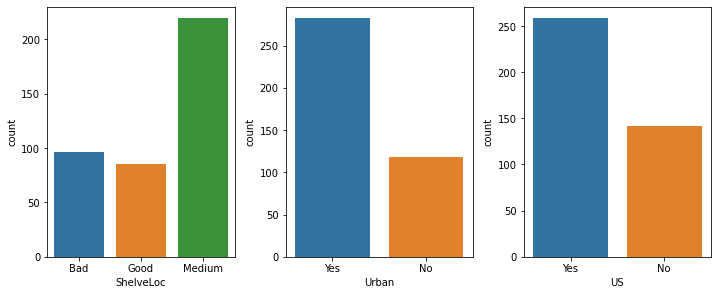

In [11]:
plt.figure(figsize=(20,20))
for i,col in enumerate(obj,1):
    plt.subplot(5,6,i)
    sns.countplot(cd[col])
plt.tight_layout()
plt.show()

In [12]:
cd['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [13]:
cd['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [14]:
cd['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [15]:
num = cd.select_dtypes(exclude='object').columns.tolist()
num

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

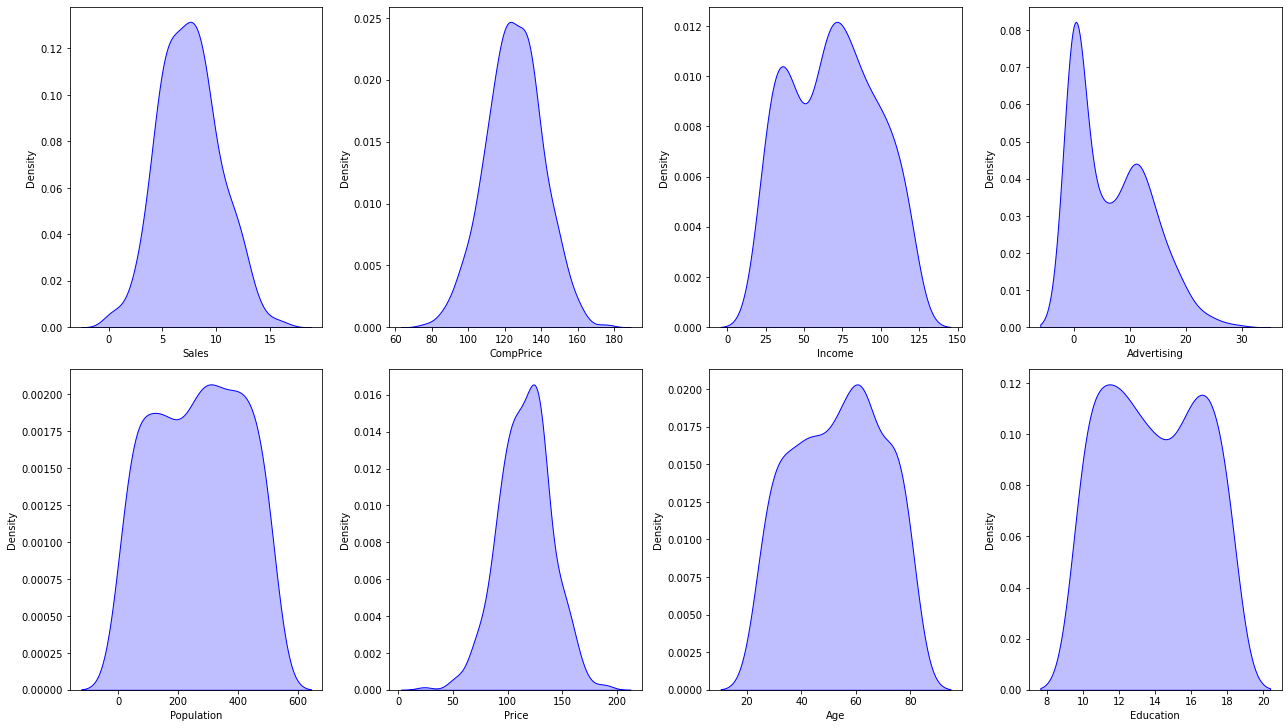

In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num,1):
    plt.subplot(8,4,i)
    sns.kdeplot(cd[col],color='b',shade=True)
plt.tight_layout() 
plt.show()

<AxesSubplot:>

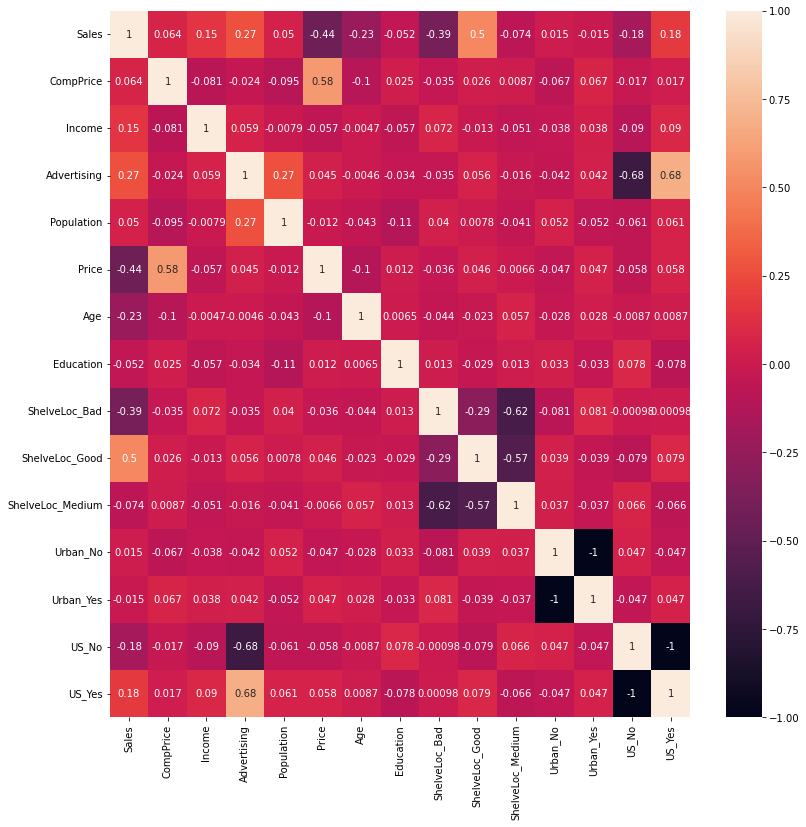

In [17]:
plt.figure(figsize=(13,13))
sns.heatmap(cdnew.corr(),annot=True)

# Model Building - Random Forest

### Sales is a continuous variable so we will take mean of variable to create model.
### <= 7.49 is classified as " Less Sale " & > 7.49 will be classified as " High Sale "

In [18]:
cdnew["sales"]="small"
cdnew.loc[cdnew["Sales"]>7.49,"sales"]="large"
cdnew.drop(["Sales"],axis=1,inplace=True)

In [19]:
cdnew

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,large
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,small
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small


In [20]:
x = cdnew.iloc[:,0:14]
y = cdnew.iloc[:,14]

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=200)

In [22]:
ytrain.value_counts()

small    162
large    158
Name: sales, dtype: int64

In [23]:
num_trees = 150
maxfeature = 8
kfold = KFold(n_splits=10,random_state=200,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees,max_features=maxfeature)
result = cross_val_score(model,xtrain,ytrain,cv=kfold)

In [24]:
result

array([0.78125, 0.65625, 0.9375 , 0.84375, 0.59375, 0.84375, 0.90625,
       0.78125, 0.875  , 0.875  ])

In [25]:
result.mean()

0.809375

In [26]:
model.fit(xtrain,ytrain)

RandomForestClassifier(max_features=8, n_estimators=150)

In [27]:
yhat = model.predict(xtest)
yhat

array(['large', 'large', 'small', 'large', 'large', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'large', 'small',
       'large', 'large', 'small', 'small', 'large', 'large', 'small',
       'small', 'large', 'large', 'large', 'small', 'large', 'small',
       'small', 'small', 'large', 'large', 'large', 'large', 'small',
       'large', 'small', 'small', 'large', 'small', 'large', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'small', 'large', 'small', 'large',
       'large', 'large', 'small', 'small', 'large', 'large', 'large',
       'small', 'small', 'large', 'large', 'small', 'large', 'large',
       'large', 'large', 'small'], dtype=object)

In [28]:
accuracy_score(ytest,yhat)

0.825

In [29]:
confusion_matrix(ytest,yhat)

array([[33,  8],
       [ 6, 33]], dtype=int64)

# Model Interpretetion

### Accuracy on the test data is 82.5% . 
#### We get 66 variables correctly calassified and 14 wrongly predicted by the model.